In [1]:
import warnings
warnings.filterwarnings('ignore')

#Importing the required libraries
import math
import datetime
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
#plt.style.use('bmh')
plt.style.use('fivethirtyeight')

In [2]:
# Importing the Data and displaying it
df = pd.read_csv('datasets/HDFC.csv')
print(df)
df.shape

            Date Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03   HDFC     EQ      271.75   293.50   293.50   293.50   
1     2000-01-04   HDFC     EQ      293.50   317.00   317.00   297.00   
2     2000-01-05   HDFC     EQ      304.05   290.00   303.90   285.00   
3     2000-01-06   HDFC     EQ      292.80   301.00   314.00   295.00   
4     2000-01-07   HDFC     EQ      296.45   290.00   296.35   281.00   
...          ...    ...    ...         ...      ...      ...      ...   
5301  2021-04-26   HDFC     EQ     2497.35  2500.00  2534.10  2483.20   
5302  2021-04-27   HDFC     EQ     2509.80  2494.15  2526.80  2486.25   
5303  2021-04-28   HDFC     EQ     2518.40  2516.10  2609.00  2508.30   
5304  2021-04-29   HDFC     EQ     2577.00  2590.90  2628.00  2533.00   
5305  2021-04-30   HDFC     EQ     2538.85  2503.10  2525.00  2411.10   

         Last    Close     VWAP   Volume      Turnover    Trades  \
0      293.50   293.50   293.50    22744  6.675364e+11 

(5306, 15)

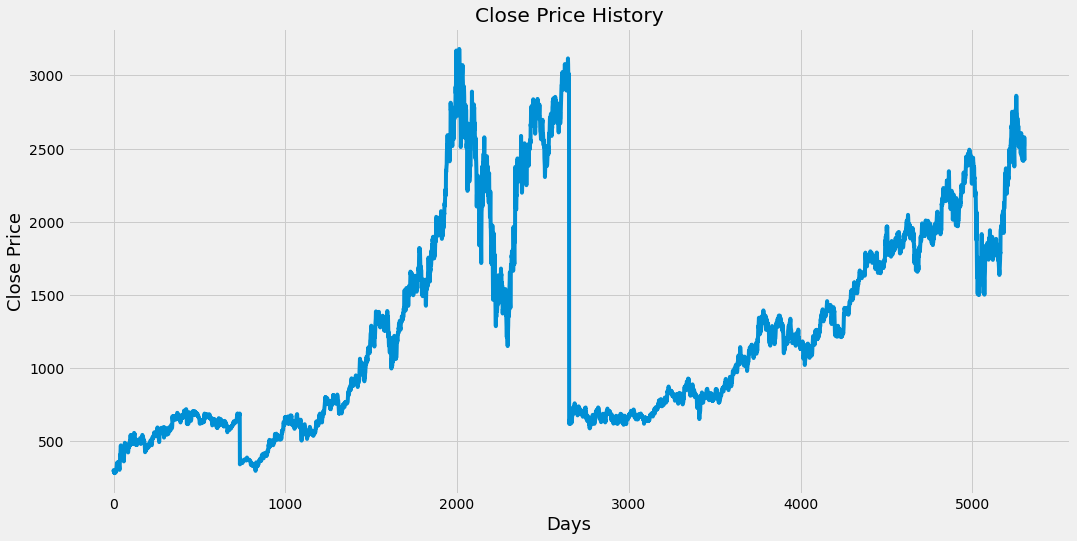

In [3]:
#Plotting the closing price history graph using matplotlib library
plt.figure(figsize=(16,8),edgecolor='Black')  
plt.title('Close Price History')  
plt.plot(df['Close']) 
plt.xlabel('Days',fontsize=18) 
plt.ylabel('Close Price',fontsize=18) 
plt.show()

In [4]:

data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil( len(dataset) *.8) #Considering the 80% of data in training data

In [5]:
#Scale all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset) 

In [6]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ] 
x_train=[]
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])  #x train contains 1st 59 data set
    y_train.append(train_data[i,0]) #y train contains remaining data sets

In [7]:
#Convert x_train and y_train to numpy arrays, so we can use them for training
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#Reshape the data into the shape accepted by the LSTM that is 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [9]:
#Build the LSTM network model
model = Sequential()  #Building model using keras library
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1))) 
model.add(LSTM(units=50, return_sequences=False)) 
model.add(Dense(units=25))  
model.add(Dense(units=1)) 

In [10]:
#Compile the model
#mean_squared_parameter Computes the mean of squares of errors between labels and predictions
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=15, epochs=5) 


Epoch 1/5
279/279 [==============================] - 5s 13ms/step - loss: 0.0053
Epoch 2/5
279/279 [==============================] - 4s 13ms/step - loss: 0.0013
Epoch 3/5
279/279 [==============================] - 4s 13ms/step - loss: 0.0011
Epoch 4/5
279/279 [==============================] - 4s 13ms/step - loss: 8.2017e-04
Epoch 5/5
279/279 [==============================] - 4s 14ms/step - loss: 7.5506e-04


In [12]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] 

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [13]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

#Similarly, reshape the data into the shape accepted by the LSTM that is 3 dimensional
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

#Getting the models predicted price values by test data
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [14]:
#Calculating the value of RootMeanSquaredError(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


78.99638599136084

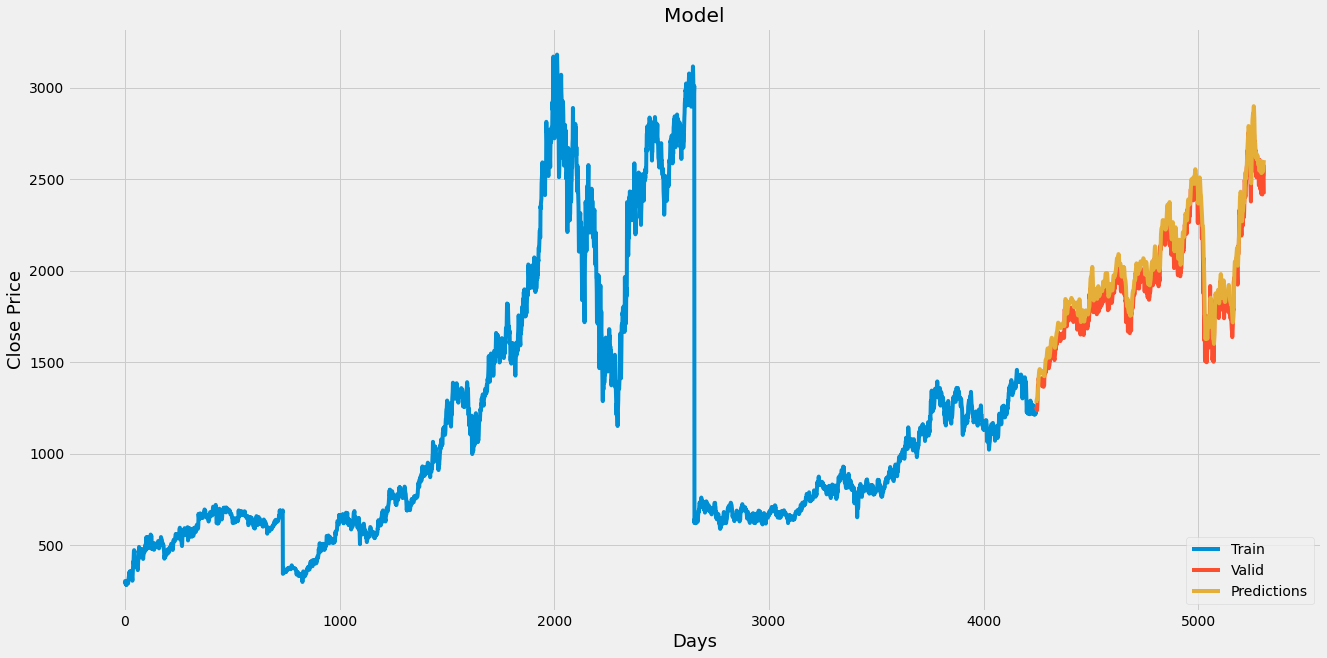

In [15]:
#Plot the data for the graph
train = data[:training_data_len]  #This is the range on what the model is trained on
valid = data[training_data_len:]  #This is the predicted data 
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [16]:
#Showing the valid and predicted prices
valid

,Close,Predictions
4245,1256.90,1277.602417
4246,1245.80,1286.610474
4247,1249.05,1292.957642
4248,1242.40,1297.554077
4249,1237.30,1298.945557
...,...,...
5301,2509.80,2540.837646
5302,2518.40,2546.703125
5303,2577.00,2558.231201
5304,2538.85,2586.948486
